<a href="https://colab.research.google.com/github/bergojr/DataSciencePortfolio/blob/main/ExemploAirBNB_sigmoidal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objetivo

A proposta para este notebook utilizar o módulo pandas com dados obtidos no site *nsideairbnb* onde há disponível dados para a cidade do Rio de Janeiro.

Nesse primeiro momento as experimentações são guiadas pelo Prof. Carlos Melo do curso Data Science na Prática do Sigmoidal. O estudo completo está disponível nesse [link](https://colab.research.google.com/drive/1rEPR7KPbBLlsEadYD0jgy1eKUKyDo02A).

# Obtenção dos dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

In [1]:
# Bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar arquivo para análise

df =  pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-12-23/visualisations/listings.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,500,5,259,2020-12-26,2.03,1,0
1,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.85,11,335
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,259,2,181,2020-03-15,2.07,1,267
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,157,3,346,2020-12-20,2.78,1,89
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.97962,-43.19230,Entire home/apt,1035,3,18,2016-02-09,0.19,2,365


# Análise de dados

Os dados serão analisado pra avalar a sua avaliar informações disponíveis. 

Descrição de cada campo:



*   id: identificação do imóvel
*   name: nome do imóvel
*   host_id: identificação do proprietário
*   host_name: proprietário
*   neighbourhood_group: grupo da vizinhança
*   neighbourhood: vizinança
*   latitude: latitude
*   longitude: longitude
*   room_type: tipo do imóvel
*   price:  preço
*   minimum_nights: número mínimo de diárias
*   number_of_reviews: quantidade de avaliações
*   last_review: última avaliação
*   reviews_per_month: avaliações por mês
*   calculated_host_listings_count: hóspedes
*   availability_365: disponibilidade anual

Vamos ver como esses dados se organizam.

In [7]:
df.keys()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


# Q1. Quantos atributos esse conjunto de dados possui? Quais os tipos de variáveis?

In [8]:
# Identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar os tipos de variável do dataset
display(df.dtypes)

Entradas:	 25784
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# Q2. Qual a porcentagem de valore ausentes no dataset?

Essa informação é muito relevante para se ter uma ideia da qualidade dos dados. Desta forma avalia-se se vale a pena considerar ou não cada uma das variáveis.

*   A variável ```neighbourhood_group``` é nula para todas as linhas.
*   Aproximadamente 40% das variáveis ```reviews_per_month ``` e ```last_review ``` são nulas 
*   As variáveis ```name``` e ```host_name``` possuem menos de 0,1% de valores nulos.



In [14]:
# ordenar as variáveis pelos valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False) * 100

neighbourhood_group               100.000000
reviews_per_month                  38.520012
last_review                        38.520012
name                                0.112473
host_name                           0.031027
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

# Q3. Qual o tipo de distribuição das variáveis

Uma boa forma de avaliar como as variáveis são distribuídas é por meio de histogramas.

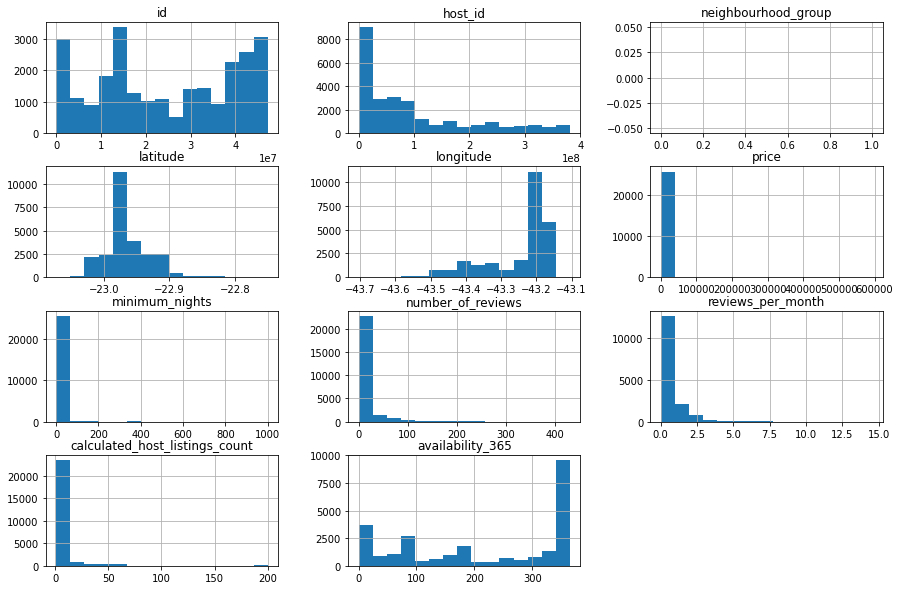

In [17]:
df.hist(bins=15, figsize= (15,10));

# Q.4 Há *outliers* nos dados?

Uma simples observação dos histogramas indica a existência de *outliers*.

In [20]:
# resumo estatístico dos dados

df[['price' , 'minimum_nights' , 'number_of_reviews' , 'reviews_per_month' , 
    'calculated_host_listings_count' , 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,25784.000000,25784.000000,25784.000000,15852.000000,25784.000000,25784.000000
mean,879.820664,4.767491,11.960479,0.590130,6.582532,215.296114
std,5179.764367,19.042074,29.371931,0.819468,19.995586,140.893876
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,200.000000,1.000000,0.000000,0.100000,1.000000,83.000000
50%,380.000000,2.000000,1.000000,0.240000,1.000000,247.000000
75%,776.000000,4.000000,9.000000,0.780000,3.000000,359.000000
max,593266.000000,1000.000000,431.000000,14.550000,200.000000,365.000000


Observando o resumo dos dados chama atenção:


*   ```price```: **75%** dos preços estão abaixo de **776**, e o valor máximo é **593266.000000**.
*   ```minimum_nights```: **75%** do mínimo de diárias requeridas está abaixo de **4** e o valor máximo é **1.0000**.
*   ```number_of_reviews```: **75%** recebem **9** reviews e o valor máximo é **431**.
*   ```reviews_per_month```: **75%** recebem **0,78** reviews por mês e o valor máximo é **14,5**.
*   ```calculated_host_listings_count```: **75%** estão abaixo de **3** e o valor máximo é **200**.

# Boxplot para ```minimum_nights```

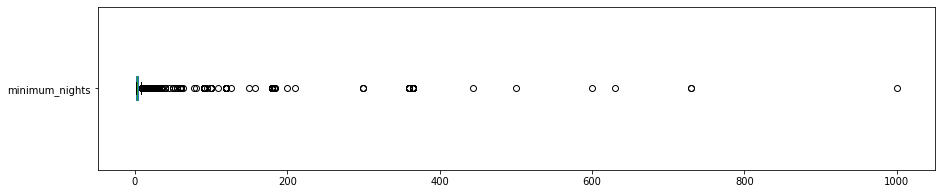

minimum_nights: valores acima de 30:
25784 entradas
0.7718%


In [28]:
# Minimun_nights

df.minimum_nights.plot(kind = 'box', vert = False, figsize = (15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: valores acima de 30:')
print("{} entradas".format(len(df['minimum_nights']>30)))
print("{:.4f}%".format((len(df[df.minimum_nights > 30])/df.shape[0])*100))

# Boxplot para ```price```

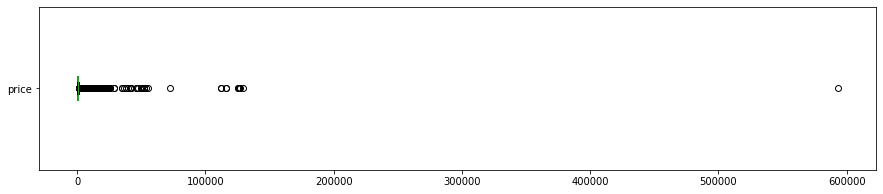

price: valores acima de 1500:
25784 entradas
9.5214%


In [29]:
# Price

df.price.plot(kind = 'box', vert = False, figsize = (15,3))
plt.show()

# ver quantidade de valores com preço acima de 1.500
print('price: valores acima de 1500:')
print("{} entradas".format(len(df['price']>1500)))
print("{:.4f}%".format((len(df[df.price > 1500])/df.shape[0])*100))

# Histograma sem *outliers*

Uma vez identificado os outliers, um novo dataframe será gerado para análise.


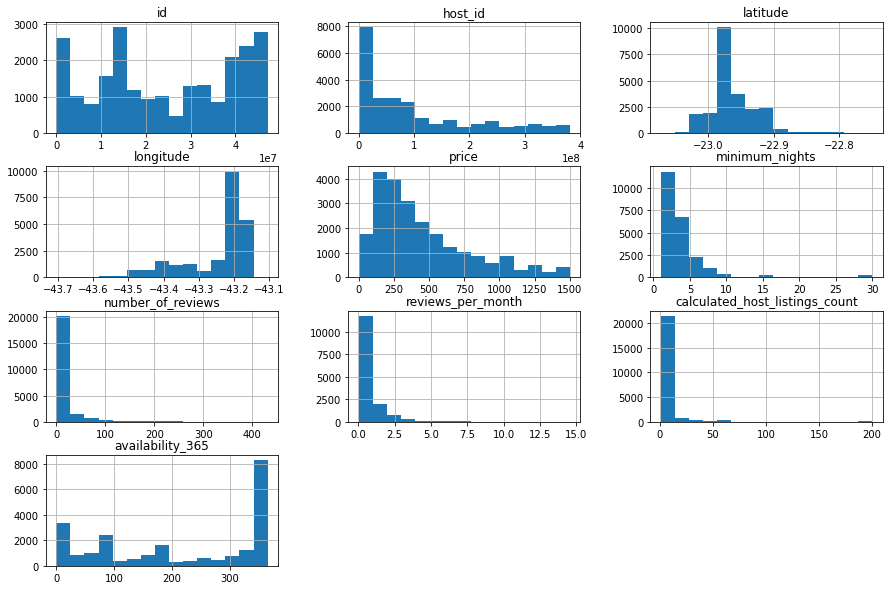

In [32]:
# Removendo outliers e criando um novo dataframe

df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 1500].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)


# Removendo a coluna 'neighbourhood_group' que está vazia

df_clean.drop('neighbourhood_group', axis = 1, inplace = True)

# Histograma com o dataframe limpo

df_clean.hist(bins = 15,figsize=(15,10));


# Q5. Há correlação entre as variáveis?

A proposta é avaliar uma matriz de correlação que será auxiliada por um *heatmap*.

In [33]:
# Criar matriz de correlação

corr = df_clean[['price' , 'minimum_nights' , 'number_of_reviews' , 'reviews_per_month' , 
    'calculated_host_listings_count' , 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.093798,-0.079755,-0.075201,0.171244,0.049127
minimum_nights,0.093798,1.000000,-0.069582,-0.102222,-0.029608,-0.002706
number_of_reviews,-0.079755,-0.069582,1.000000,0.644582,-0.034952,-0.076313
reviews_per_month,-0.075201,-0.102222,0.644582,1.000000,0.003108,-0.154244
calculated_host_listings_count,0.171244,-0.029608,-0.034952,0.003108,1.000000,0.008742
availability_365,0.049127,-0.002706,-0.076313,-0.154244,0.008742,1.000000


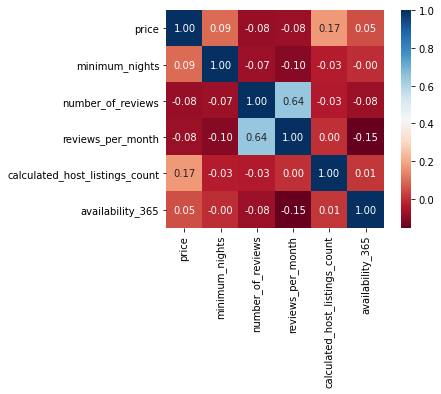

In [35]:
sns.heatmap(corr, cmap= 'RdBu', fmt='.2f', square=True, linecolor='white', annot=True);